<div style="border:solid blue 2px; padding: 20px"> 

<strong>Reviewer's Introduction</strong>

Hello Jatan! 👋 

I'm happy to review your project today.

I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> Everything is done successfully.
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> Suggestions for optimizations or improvements.
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> This must be fixed for a project to be approved.
</div>

Please don't remove my comments :) If you have any questions or comments, don't hesitate to respond to my comments by creating a box that looks like this: 
<div class="alert alert-info"> <b>Student's comment:</b> Your text here.</div>    
<br>


📌 Here's how to create code for student comments inside a Markdown cell:
    
    
    <div class="alert alert-info">
    <b> Student's comment</b>

    Your text here. 
    </div>

You can find out how to **format text** in a Markdown cell or how to **add links** [here](https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet). 


<hr>
Reviewer: Han Lee (hanlee_97297 on Discord)<br>
Don’t forget to rate your experience by leaving feedback here:  
<a href="https://form.typeform.com/to/msiTC4LB" target="_blank">https://form.typeform.com/to/msiTC4LB</a>
</div>


## Project description
You work for the OilyGiant mining company. Your task is to find the best place for a new well.

Steps to choose the location:

- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

<b>Step 1: Download and prepare the data. Explain the procedure.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Import all 3 datasets into dataframes as regions 1 - 3
region_1 = pd.read_csv("geo_data_0.csv")
region_2 = pd.read_csv("geo_data_1.csv")
region_3 = pd.read_csv("geo_data_2.csv")

In [4]:
# Let's take a look at the first few entries in each region (dataset)
print('\n','region_1:','\n', region_1.head())
print('\n','region_2:','\n', region_2.head())
print('\n','region_3:','\n', region_3.head())


 region_1: 
       id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

 region_2: 
       id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

 region_3: 
       id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [5]:
# Check for additional information about the datasets
print('region_1:')
print(region_1.info())
print()
print('region_2:')
print(region_2.info())
print()
print('region_3:')
print(region_3.info())

region_1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

region_2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

region_3:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns 

In [6]:
# Let's check for duplicates
print(region_1.duplicated().sum())
print(region_2.duplicated().sum())
print(region_3.duplicated().sum())

0
0
0


<span style='color:blue'> Comments: I downloaded the 3 data files and renamed them as regions 1, 2 and 3. Then I checked the first few line entries in each region to see what the data looks like and we can see there are only 5 columns in all regions. Next I ran .info() on each and saw that all 3 regions have 100,000 entries with 0 null values, additionally, each dataset is the same in terms of data types. The id column is object and the rest are floats with both positive and negative values. Lastly, I checked for duplicates and confirmed there are 0 duplicates in all 3 datasets. I wanted to further investigate the type of data we're working with so I made some graphs of the datasets below.

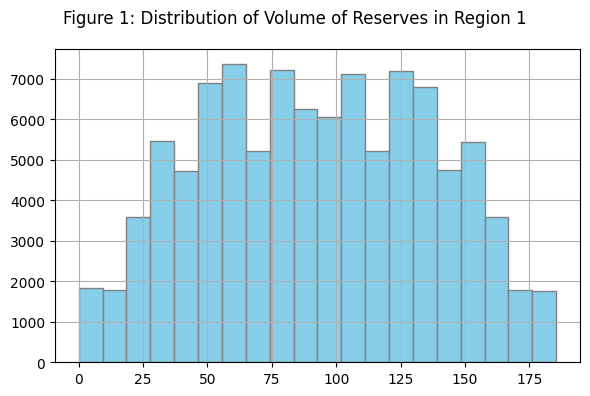

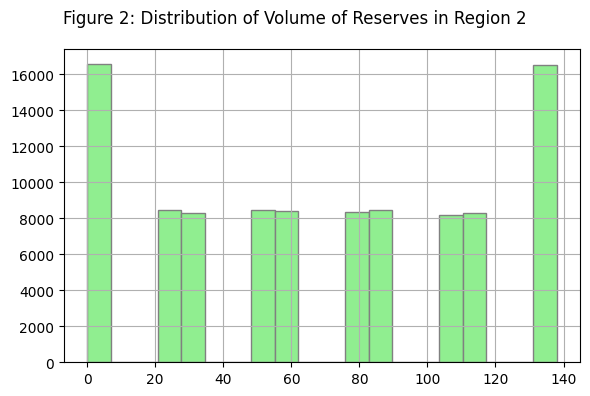

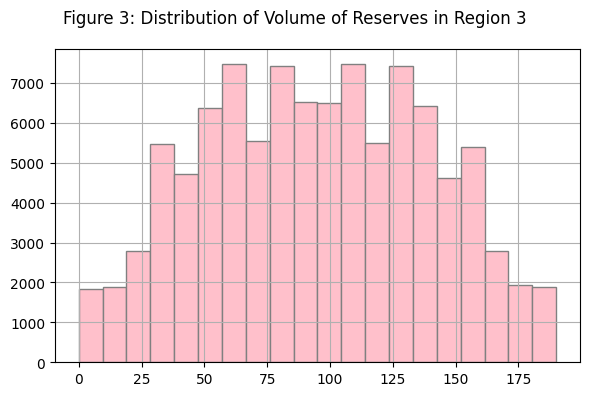

In [7]:
# Let's graph the distribution of the product column for reach region

def plot_histogram(df, title, color):
    df.hist(figsize=(6, 4), bins=20, color = color, edgecolor = 'grey')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_histogram(region_1['product'], "Figure 1: Distribution of Volume of Reserves in Region 1", color='skyblue')
plot_histogram(region_2['product'], "Figure 2: Distribution of Volume of Reserves in Region 2", color='lightgreen')
plot_histogram(region_3['product'], "Figure 3: Distribution of Volume of Reserves in Region 3", color='pink')

In [8]:
print(region_2.sort_values(by='product', ascending = False).head(100))
print('Unique Product Values in Each Region:')
print(region_1['product'].nunique())
print(region_2['product'].nunique())
print(region_3['product'].nunique())

          id        f0         f1        f2     product
53864  MzRzn  2.901352  -3.475398  5.001393  137.945408
97083  nW6eC -4.030430 -14.020643  5.009571  137.945408
88340  xwJzQ -3.373117  -9.227661  4.994369  137.945408
64879  Xd8DC -5.360281  -2.388204  5.001439  137.945408
7288   Stdrb -8.058661  -2.244840  5.000753  137.945408
...      ...       ...        ...       ...         ...
65224  uPAzz -0.293210  -2.754970  4.994425  137.945408
65161  Y5kc5 -3.865472  -0.464253  5.000527  137.945408
16399  h4SS4 -6.826303  -6.890756  5.000682  137.945408
97061  XTzo8 -6.013999  -6.658913  5.002643  137.945408
40071  8lkW6 -8.998220  -4.760468  5.000263  137.945408

[100 rows x 5 columns]
Unique Product Values in Each Region:
100000
12
100000


<span style = 'color:blue'> Comments: From the histograms above we see that both Regions 1 and 3 display standard distribution curves; however, we notice that is not the case with Region 2. In fact there is something clearly different with the data in Region 2. In order to investigate this, I sorted the region 2 data by product column and we see the top 200 values for product are exactly the same! At first I thought this could be due to duplicates but we already determined there are no duplicates. Additionally, we see that even though the product values are the same, the rest of the row values including id column are different! This shows that we are not working with duplicates but possibly faulty data! I even triple checked using .nunique() on the product column for each region. Once again, we can see that in Regions 1 and 3, every single product column value is distinct (as expected!). However, there are only 12 distinct values in the product column for Region 2! This is highly unusual as we are working with data of volume of oil reserves in the thousands. This is clearly a mistake in data or it is done on purpose by the prompters to challenge us (good one!). I will still continue treating Region 2 the same for the rest of this project but in choosing the best Region, I cannot choose Region 2 as the data to me is flawed.

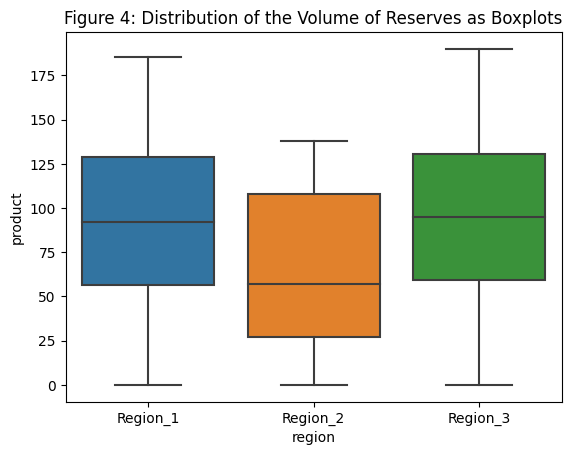

In [9]:
import seaborn as sns
region_1['region'] = 'Region_1'
region_2['region'] = 'Region_2'
region_3['region'] = 'Region_3'
combined = pd.concat([region_1, region_2, region_3], ignore_index=True)

sns.boxplot(x='region', y = 'product', data=combined)

plt.title('Figure 4: Distribution of the Volume of Reserves as Boxplots')
plt.ylabel('product')
plt.show()

<span style='color:blue'> Comments: I further evaluated the data by graphing boxplots for the product column (as that represents the volume of oil reserves) and we can see that the distribution for Region 2 is again different from the other 2, it is much smaller and the median is way lower. Since we already determined there is something not right about Region 2 data and seeing this boxplot, it is easy to understand that either Region 1 or Region 3 will be the best region to select. For now, we will leave it as such and move on to Step 2 for model building.

<b> Step 2: Train and test the model for each region:

In [10]:
# Let's start by setting up the features and target for each region (dataset)
features_1 = region_1[['f0', 'f1', 'f2']]
target_1 = region_1['product']

features_2 = region_2[['f0', 'f1', 'f2']]
target_2 = region_2['product']

features_3 = region_3[['f0', 'f1', 'f2']]
target_3 = region_3['product']

<b>Step 2.1: Split the data into a training set and validation set at a ratio of 75:25.

In [11]:
# Split each region dataset into a 75% training and a 25% validation set
features_train_1, features_val_1, target_train_1, target_val_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=123)

features_train_2, features_val_2, target_train_2, target_val_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=123)

features_train_3, features_val_3, target_train_3, target_val_3 = train_test_split(
    features_3, target_3, test_size=0.25, random_state=123)

<b> Step 2.2: Train the model and make predictions for the validation set.

<b> Step 2.3: Save the predictions and correct answers for the validation set

In [12]:
# Let's use Linear Regression
# Save the predictions and correct answers 

model_1 = LinearRegression().fit(features_train_1, target_train_1)
predictions_1 = model_1.predict(features_val_1)
correct_answers_1 = target_val_1

model_2 = LinearRegression().fit(features_train_2, target_train_2)
predictions_2 = model_2.predict(features_val_2)
correct_answers_2 = target_val_2

model_3 = LinearRegression().fit(features_train_3, target_train_3)
predictions_3 = model_3.predict(features_val_3)
correct_answers_3 = target_val_3

<b> Step 2.4: Print the average volume of predicted reserves and model RMSE

In [13]:
# Let's calculate the mean of predictions for each region 
avg_predictions_1 = np.mean(predictions_1)
avg_predictions_2 = np.mean(predictions_2)
avg_predictions_3 = np.mean(predictions_3)

# Let's calculate the model RMSE for each region
rmse_1 = np.sqrt(mean_squared_error(target_val_1, predictions_1))
rmse_2 = np.sqrt(mean_squared_error(target_val_2, predictions_2))
rmse_3 = np.sqrt(mean_squared_error(target_val_3, predictions_3))

# Print the results
print(f"Region 1: Average Volume of Predicted Reserves: {avg_predictions_1:.3f} k | RMSE: {rmse_1:.3f}")
print(f"Region 2: Average Volume of Predicted Reserves: {avg_predictions_2:.3f} k | RMSE: {rmse_2:.3f}")
print(f"Region 3: Average Volume of Predicted Reserves: {avg_predictions_3:.3f} k | RMSE: {rmse_3:.3f}")

Region 1: Average Volume of Predicted Reserves: 92.549 k | RMSE: 37.648
Region 2: Average Volume of Predicted Reserves: 69.280 k | RMSE: 0.895
Region 3: Average Volume of Predicted Reserves: 95.099 k | RMSE: 40.128


<b> Step 2.5: Analyze the results

<span style = 'color:blue'>Comments: I started of by setting up the features and target columns for each region then I split the datasets into training and validation sets for each region (75:25) and finally I built a model for each region using LinearRegression(). Once the models were built, I moved on to step 2.4 to find the average volume of predicted reserves and model RMSE. I used np.mean to find the averages of the predictions and then mean_squared_error with np.sqrt to find the RMSE for each model. From the results above we see the average volume of predicted reserves for both regions 1 and 3 are very similar around 95k and just as expected, region 2 average is quite low being under 70k. This theme follows suit with RMSE calculation as well because for both regions 1 and 3 we see similar RMSE around 40, which seems high but for a large dataset it is expected. Contrarily, region 2 has a RMSE of 0.89, ideally that would be fantastic as a low RMSE means low error between the predicted and actual values. However, since we know the data of region 2 is centered around the same values, we can expect the error to be very small. We can now move on to the profit calculation steps.

<b> Step 3: Prepare for profit calculation:

<b> Step 3.1: Store all key values for calculations in separate variables.

In [14]:
wells = 200
budget = 100e6
cost_per_well = budget / wells
rev_per_unit = 4500 # unit = thousand barrels

<b> Step 3.2: Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

In [15]:
# Let's calculate the volume of barrels required to balance the cost of building a new well
volume_required = cost_per_well / rev_per_unit
print(f"Volume of Reserves needed = {volume_required:.3f} thousand barrels")

# Average Volume of Reserves in Each Region
avg_product_1 = region_1['product'].mean()
avg_product_2 = region_2['product'].mean()
avg_product_3 = region_3['product'].mean()
print()
print(f"Average Volume of Actual Reserves in Region 1: {avg_product_1:.3f} thousand barrels")
print(f"Average Volume of Actual Reserves in Region 2: {avg_product_2:.3f} thousand barrels")
print(f"Average Volume of Actual Reserves in Region 3: {avg_product_3:.3f} thousand barrels")

Volume of Reserves needed = 111.111 thousand barrels

Average Volume of Actual Reserves in Region 1: 92.500 thousand barrels
Average Volume of Actual Reserves in Region 2: 68.825 thousand barrels
Average Volume of Actual Reserves in Region 3: 95.000 thousand barrels


In [16]:
# Average Volume of Reserves in the Top 200 wells in each Region

# Let's find the top 200 wells in each region
top_200_region_1 = region_1.sort_values(by='product', ascending = False).head(200)
top_200_region_2 = region_2.sort_values(by='product', ascending = False).head(200)
top_200_region_3 = region_3.sort_values(by='product', ascending = False).head(200)

avg_top_200_region_1 = top_200_region_1['product'].mean()
avg_top_200_region_2 = top_200_region_2['product'].mean()
avg_top_200_region_3 = top_200_region_3['product'].mean()

print(f"Average Volume of Reserves in Top 200 wells in Region 1: {avg_top_200_region_1:.3f} thousand barrels")
print(f"Average Volume of Reserves in Top 200 wells in Region 2: {avg_top_200_region_2:.3f} thousand barrels")
print(f"Average Volume of Reserves in Top 200 wells in Region 3: {avg_top_200_region_3:.3f} thousand barrels")

Average Volume of Reserves in Top 200 wells in Region 1: 184.834 thousand barrels
Average Volume of Reserves in Top 200 wells in Region 2: 137.945 thousand barrels
Average Volume of Reserves in Top 200 wells in Region 3: 189.551 thousand barrels


<b> Step 3.3: Provide the findings about the preparation for profit calculation step.

<span style = 'color:blue'> Comments: The findings from the preparation for profit calculation shows that the volume of reserves sufficient for developing a new well without losses is around 111k barrels. Based on our calculations previously, we already saw that the average volume of reserves in each region is under 111k, as such we would naturally claim that none of the regions will yield a profit as none are producing enough volume to meet the required volume to break even. However, we should acknolwlege that the prompt says that when exploring a region, the best 200 wells are chosen for profit calculation! 

<span style = 'color:blue'> As such, taking into account the top 200 wells per product (volume of reserves) we can recalculate the average volume of reserves in each region and this time we obtain much better results. We see both Regions 1 and 3 to have over 180K barrels on average per well. Meanwhile, even region 2 exceeds the break even point with 137K but once again, region 2 is signficantly lower than the other 2 regions. 

<span style = 'color:blue'> Finally comparing the average volume of reserves within the top 200 wells, we can see that both regions 1 and 3 can be chosen as both will produce more than the required volume and generate a profit.


<b> Step 4: Write a function to calculate profit from a set of selected oil wells and model predictions:

<b> Step 4.1: Pick the wells with the highest values of predictions.

<b> Step 4.2: Summarize the target volume of reserves in accordance with these predictions

<b> Step 4.3: Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

<span style='color:blue'> Comments: For the following section, I am a little confused by the prompt when it says: "When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation." I do not understand if this means that the 500 points are picked at random of which 200 best are used. The prompt does not clearly say 500 random points. I don't know why 500 points would be chosen at random when we could simply choose the best 200 points overall? If we want to know the most profitable region, then why not just choose the best 200 points? As such, I did the work with the assumption that 500 best points are picked and then 200 best of those are sampled. If this is incorrect, I can re-do this section by adding in the random condition. I wish the prompt was more clear on that.

In [17]:
# Let's define a function to calculate profit
def profit(predictions, target):
    
    top_200_wells = np.argsort(predictions)[-wells:]
    top_200_targets = np.array(target)[top_200_wells]
    
    total_volume = top_200_targets.sum()
    revenue = total_volume * rev_per_unit
    
    profit = revenue - budget
    
    return profit, total_volume

In [18]:
# Calculate the Profit and Volume of Reserves based on Model Predictions

# Required Volume per Well
print(f'Volume Required per well = {volume_required:.3f}k barrels')
print()
# Region 1
profit_1, total_volume_1 = profit(predictions_1, target_val_1)
print(f'Region 1: Profit = ${profit_1:,.3f} | Average Volume per Well = {total_volume_1 / 200:.3f}k barrels')

# Region 2
profit_2, total_volume_2 = profit(predictions_2, target_val_2)
print(f'Region 2 Profit: ${profit_2:,.3f} | Average Volume per Well = {total_volume_2 / 200:.3f}k barrels ')

# Region 3
profit_3, total_volume_3 = profit(predictions_3, target_val_3)
print(f'Region 3 Profit: ${profit_3:,.3f} | Average Volume per Well = {total_volume_3 / 200:.3f}k barrels')

Volume Required per well = 111.111k barrels

Region 1: Profit = $35,346,709.173 | Average Volume per Well = 150.385k barrels
Region 2 Profit: $24,150,866.967 | Average Volume per Well = 137.945k barrels 
Region 3 Profit: $23,703,438.630 | Average Volume per Well = 137.448k barrels


<span style = 'color:blue'>  Comments: In order to complete Step 4, I started with a profit function that picked the top 200 wells based on highest predictions values. Then I found the 200 target wells in accordance to those top 200 predicted values. Then I summed the target wells to compute a total volume of reserves. This basically means that I identified the total volume of oil reserves for the top 200 wells with the highest volumes. Furthermore, I calculated the total revenue for these 200 wells by multiplying this total volume of the oil reserves with the revenue generated per unit (thousand barrels), which was provided in the prompt as $4500. Lastly, I calculated the total profit by taking this total revenue and subtracting from it the total cost (budget) as provided by prompt of 100 million USD. Therfore, my function returns a profit and a total volume for the top 200 wells based on model predictions. Computing all the profits and total volumes for each region we see that Region 1 shows the highest profit with over 35M USD and an average volume of reserves of over 150k barrels. In contrast, the numbers for Regions 2 and 3 are quite low as the profit in both those regions is under 25M USD and the average volume of reserves is under 138k barrels. We already knew that the data for Region 2 in not reliable so we eliminated it early in this project. As such the decision was between Regions 1 and 3 and based on this profit calcualtion, the best region for oil wells' development is Region 1.

<b> Step 5: Calculate risks and profit for each region:

<b> Step 5.1: Use the bootstrapping technique with 1000 samples to find the distribution of profit.

<b> Step 5.2: Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

<b> Step 5.3: Provide findings: suggest a region for development of oil wells and justify the choice.

In [19]:
# Boostrap Profit Function post Review - iteration 1:  

def bootstrap_profit_1(predictions, targets):
    regions = pd.DataFrame({'predictions':predictions, 'targets':targets})
    predictions = pd.Series(predictions).reset_index(drop=True)
    targets = pd.Series(targets).reset_index(drop=True)
    
    profits = []
    volume = []

    state = np.random.RandomState(111)

    for i in range(1000):
        sample_500 = regions.sample(n=500,replace=True, random_state = state)
        bootstrap_predictions = sample_500['predictions'].values
        bootstrap_targets = sample_500['targets'].values

        profit_bs, total_volume_bs = profit(bootstrap_predictions, bootstrap_targets)
        profits.append(profit_bs)
        volume.append(total_volume_bs)

    return np.array(profits), np.array(volume)

profits_1_bs, total_volume_1_bs = bootstrap_profit_1(predictions_1, target_val_1)
profits_2_bs, total_volume_2_bs = bootstrap_profit_1(predictions_2, target_val_2)
profits_3_bs, total_volume_3_bs = bootstrap_profit_1(predictions_3, target_val_3)

<span style = color:blue> Comments: I removed he redundant variables and made sure they are only displayed once at the beginning of Step 3. Then I reconstructed my bootstrap function. I applied the .sample() method to sample 500 wells and use those 500 wells into my profit function from before to select the top 200 wells. I ran into a couple issues so I created a regions dataframe that holds the predictions and target columns, then I made sure to convert both columns into pandas Series to resolve those issues. I recalculated the rest of the project below using this new bootrstrap function and got a different set of results than previously.   


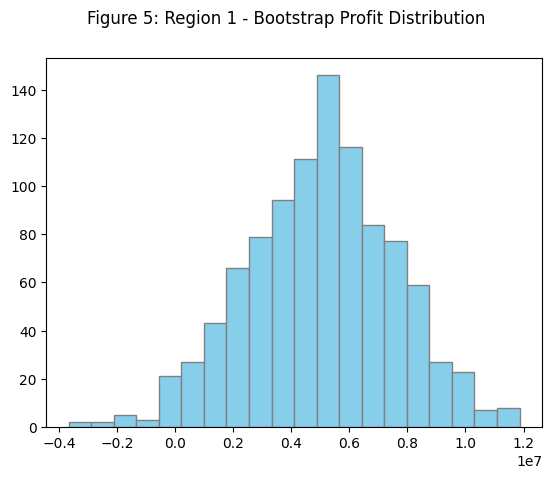

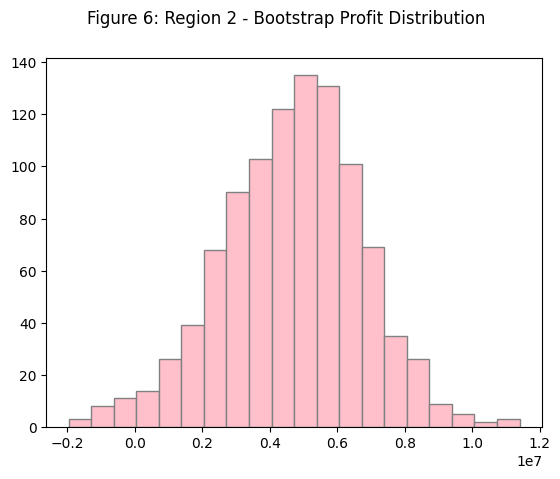

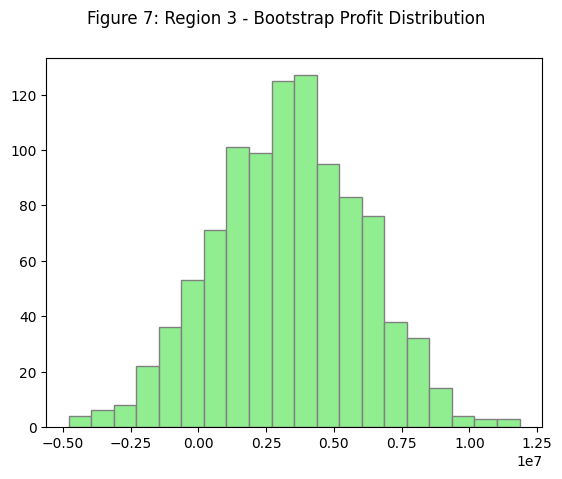

In [20]:
# Graph the distribution of Profit for Visualization Purposes

def distribution(profit, title, color):
    plt.hist(profit, bins=20, color = color, edgecolor = 'grey')
    plt.suptitle(title)
    plt.show()

distribution(profits_1_bs, "Figure 5: Region 1 - Bootstrap Profit Distribution", color='skyblue')
distribution(profits_2_bs, "Figure 6: Region 2 - Bootstrap Profit Distribution", color='pink')
distribution(profits_3_bs, "Figure 7: Region 3 - Bootstrap Profit Distribution", color='lightgreen')

In [21]:
# Find Average Profit from Bootstrapping for Each Region

avg_profit_1_bs = profits_1_bs.mean()
avg_profit_2_bs = profits_2_bs.mean()
avg_profit_3_bs = profits_3_bs.mean()

print(f'Average Bootstrapping Profit for each Region:')

print(f'Region 1 = ${avg_profit_1_bs:,.2f}')
print(f'Region 2 = ${avg_profit_2_bs:,.2f}')
print(f'Region 3 = ${avg_profit_3_bs:,.2f}')

Average Bootstrapping Profit for each Region:
Region 1 = $5,037,417.98
Region 2 = $4,678,674.28
Region 3 = $3,329,266.22


In [22]:
# Calculate the Confidence Interval for each Region:
def confidence_intervals(profits):
    lower = np.percentile(profits, 2.5)
    upper = np.percentile(profits, 97.5)

    return lower, upper
    
lower_1, upper_1 = confidence_intervals(profits_1_bs)
lower_2, upper_2 = confidence_intervals(profits_2_bs)
lower_3, upper_3 = confidence_intervals(profits_3_bs)

print(f'95% Confidence Intervals for Region 1: ${lower_1:,.2f} to ${upper_1:,.2f}')
print(f'95% Confidence Intervals for Region 2: ${lower_2:,.2f} to ${upper_2:,.2f}')
print(f'95% Confidence Intervals for Region 3: ${lower_3:,.2f} to ${upper_3:,.2f}')

95% Confidence Intervals for Region 1: $13,388.90 to $9,817,187.12
95% Confidence Intervals for Region 2: $132,230.35 to $8,508,588.58
95% Confidence Intervals for Region 3: $-1,998,660.69 to $8,491,498.12


In [23]:
# Find the Risk of Loss (Negative Profit) for Each Region:

risk_of_loss_1 = (profits_1_bs < 0).mean() * 100
risk_of_loss_2 = (profits_2_bs < 0).mean() * 100
risk_of_loss_3 = (profits_3_bs < 0).mean() * 100

print(f'Region 1: Risk of Loss = {risk_of_loss_1:.1f} %')
print(f'Region 2: Risk of Loss = {risk_of_loss_2:.1f} %')
print(f'Region 3: Risk of Loss = {risk_of_loss_2:.1f} %')

Region 1: Risk of Loss = 2.4 %
Region 2: Risk of Loss = 2.2 %
Region 3: Risk of Loss = 2.2 %


<span style = color:blue> Comments: So using this new and improved bootstrap function, I found the Average Profit for each regions were significantly lower than before! Now the Average Profit for Region 1 is around 5M USD and the other 2 regions is around 4M USD. Additionally, the Confidence Intervals changed quite a bit too. Now the CI for Region 1 ranges between over 13,000 USD to nearly 10M USD. This is a huge range! This means that Region 1 can yield a profit of around 13,000 or as much as 10M USD. Likewise for Region 2 the profits could range from 132k USD to over 8M USD and for Region 3, there can actually be a loss (negative profit) of nearly 2M USD or a profit of over 8M USD. Moving on to calculate the Risk of Loss, we can see that all regions are lower than 2.5% but Region 1 actually is slightly greater with 2.4 instead of 2.2. We should select the region with the highest average profit from these 3 regions. Since Region 1 shows the highest Average Profit (post Bootstrapping) we should select this region for the oil well's development! 
  

<span style='color:blue'> Comments: For Section 5, I first defined a new function as bootstrap_profit that would calculate the profit using the bootstrapping technique with 1000 samples. Based on these results I graphed the distributions for reach region in Figures 5-7. From these histograms we can see that Regions 1 and 3 still maintain a very Standard distribution but for Region 2, the data is fixed on 1 value. Since bootstrapping with 1000 samples yields a 1000 values of profit, I calculated the average for each region and we can see that the Average Profit after Boostrapping for Region 1 is still the highest with nearly 30M USD, whereas, Regions 2 and 3 are 24M USD and 20M USD, respectively. Since these are just average profits, we may have greater and less than values than the average values for each region. As such, we calculated the upper and lower limits via a 95% confidence intervals on the bootstrap profits for each region. From the Confidence Intervals we can see that Region 1 profits can range from 26M USD to 32M USD. Additionally, the upper limits for Regions 2 and 3 are less than the lower limits of Region 1. As a result, we come to the conclusion that Region 1 is clearly the superior region for oil well's development.

<span style = color:blue> Comments: Project Conclusion: I revisited the Bootstrapping Technique, I updated the bootstrap profit function and then analyzed the new results. I see some changes specifically in the average profits as they went from 20M USD to 5M USD, which perhaps makes more sense. Additionally, I saw how this change affect the Confidence Intervals and made them more realisitic as they even included negative profits to show a loss! This makes a lot of sense especially after seeing the Risk of Loss and how they were around 2% rather than 0 as I had before. There should always be some level of risk and having it be 0% simply is not realistic. I really understand bootstrapping much better now seeing the results and the difference it made to the project. I still ended up choosing Region 1 as it showed the highest Average Profit. HOWEVER, it is important to note that the since we are sampling 500 points out of 100k entries, it is possible to get different results based on which 500 points are selected. I set the random state to a specific number but I realized that as that number changes the results can also be very different. Nonetheless, based on my model predictions, I came to the conclusion that Region 1 is the best choice.

<span style='color:blue'> <b>Project Conclusion:

<span style='color:blue'> This project took me a lot of time and energy as it was not easy even but it was very interesting. I had to remember to apply basic EDA strategies to idenfity errors in the data and to my surprise I was able to see something very unusual in Region 2 as there were only 12 unique values for the product column in a dataset of 100,000 entires. That does not seem correct to me as it is rarely the case in nature to find exact numbers for things like volume in different oil wells. As such it was great to find such a trait in the dataset becuase it showed that these things can happen and in the real world I may encounter such datasets as well. I chose to continue the rest of the project with region 2 instead of omitting the entire dataset right away. I liked building the models for each region and then creating functions to calculate profit and further using bootstrapping to help make the decision of choosing a region even more clear. I do think I have made some mistakes along the way but I truly hope that I have retained the fundamentals of this Sprint and applied them to the best of my ability and in accordance to what the project requires.